In [19]:
library(dplyr)
bodyPerformance <- read.csv('../../Data/프로젝트/bodyPerformance.csv')
bodyPerformance$성별<-ifelse(bodyPerformance$성별=='M',0,1)
bodyPerformance <- rename(bodyPerformance, "이완기혈압" = "이완기혈압_min")
bodyPerformance <- rename(bodyPerformance, "수축기혈압" = "수축기혈압_분")
head(bodyPerformance)

나이,성별,키_cm,몸무게_kg,체지방율,이완기혈압,수축기혈압,악력,앉아서앞으로구부리기_cm,윗몸일으키기,멀리뛰기,등급
27,0,172.3,75.24,21.3,80,130,54.9,18.4,60,217,C
25,0,165.0,55.80,15.7,77,126,36.4,16.3,53,229,A
31,0,179.6,78.00,20.1,92,152,44.8,12.0,49,181,C
32,0,174.5,71.10,18.4,76,147,41.4,15.2,53,219,B
28,0,173.8,67.70,17.1,70,127,43.5,27.1,45,217,B
36,1,165.4,55.40,22.0,64,119,23.8,21.0,27,153,B


In [27]:
bodyPerformance$혈압 <- ifelse(bodyPerformance$이완기혈압 <80 & bodyPerformance$수축기혈압 < 120,'1',
                  ifelse(bodyPerformance$이완기혈압 <80 & bodyPerformance$수축기혈압 >= 120 & bodyPerformance$수축기혈압 <= 129,'2',
                  ifelse((bodyPerformance$이완기혈압 >= 80 & bodyPerformance$이완기혈압 <=89) | (bodyPerformance$수축기혈압 >= 130 & bodyPerformance$수축기혈압 <= 139),'3','4'
#                   ifelse(bodyPerformance$이완기혈압 >= 90 | bodyPerformance$수축기혈압 >= 140,'4','5'
                  )))

In [30]:
bodyPerformance <- arrange(bodyPerformance,등급)
head(bodyPerformance)

나이,성별,키_cm,몸무게_kg,체지방율,이완기혈압,수축기혈압,악력,앉아서앞으로구부리기_cm,윗몸일으키기,멀리뛰기,등급,혈압
25,0,165.0,55.8,15.7,77,126,36.4,16.3,53,229,A,2
42,0,169.2,65.4,19.3,63,110,43.5,16.0,68,211,A,1
45,1,159.0,63.1,30.9,93,144,34.1,19.0,30,155,A,4
26,0,179.9,71.5,9.7,64,135,59.6,17.8,61,239,A,3
59,1,155.9,62.7,30.2,76,143,36.8,29.1,25,122,A,4
50,1,159.8,57.1,24.4,63,103,30.8,24.4,30,143,A,1


In [61]:
bodyPerformance$혈압 <- as.numeric(bodyPerformance$혈압)
# hist(bodyPerformance$혈압)

In [58]:
등급별혈압 <- table(bodyPerformance$혈압, bodyPerformance$등급)

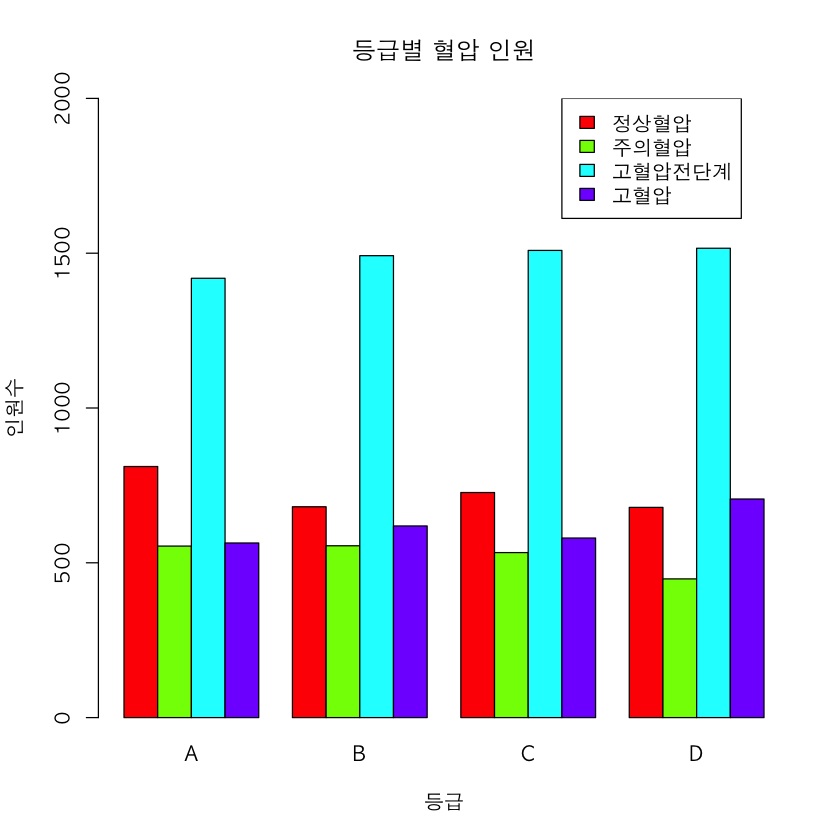

In [66]:
par(family ="AppleGothic")
options(warn= -1)
barplot(등급별혈압,
       ylim= c(0,2000),
       main = "등급별 혈압 인원",
       xlab = "등급",
       ylab = "인원수",
       col = rainbow(4),
        beside = T
       )

legend(14,2000,
      c("정상혈압","주의혈압","고혈압전단계","고혈압"),
     fill = rainbow(4)
      )